Import packages

In [247]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import statsmodels.api as sm
from scipy import stats

Read in datasets

In [248]:
avgtemp = pd.read_csv("avgtemp.csv")
mintemp = pd.read_csv("mintemp.csv")
maxtemp = pd.read_csv("maxtemp.csv")
prec = pd.read_csv("precipitation.csv")
pdsi = pd.read_csv("pdsi.csv")

Give 'Value' column more descriptive names in each dataset and remove 'Anomaly' column

In [249]:
avgtemp.rename({"Value":"Avg Temp"}, axis=1, inplace=True)
avgtemp.drop("Anomaly", axis=1, inplace=True)

In [250]:
mintemp.rename({"Value":"Min Temp"}, axis=1, inplace=True)
mintemp.drop("Anomaly", axis=1, inplace=True)

In [251]:
maxtemp.rename({"Value":"Max Temp"}, axis=1, inplace=True)
maxtemp.drop("Anomaly", axis=1, inplace=True)

In [252]:
prec.rename({"Value":"Precipitation"}, axis=1, inplace=True)
prec.drop("Anomaly", axis=1, inplace=True)

In [253]:
pdsi.rename({"Value":"PDSI"}, axis=1, inplace=True)
pdsi.drop("Anomaly", axis=1, inplace=True)

Merge the 5 datasets into one big one

In [254]:
merged_1 = pd.merge(avgtemp, mintemp, on="Date")
merged_2 = pd.merge(merged_1, maxtemp, on="Date")
merged_3 = pd.merge(merged_2, prec, on="Date")
data = pd.merge(merged_3, pdsi, on="Date")
data

,Date,Avg Temp,Min Temp,Max Temp,Precipitation,PDSI
0,189501,26.69,16.52,36.86,3.32,1.47
1,189502,26.60,15.57,37.65,1.41,-0.45
2,189503,39.97,27.86,52.07,1.99,-0.83
3,189504,52.90,39.45,66.33,1.99,-1.42
4,189505,59.94,47.05,72.81,2.88,0.04
...,...,...,...,...,...,...
1543,202308,74.37,61.81,86.90,2.78,-1.99
1544,202309,67.75,55.06,80.44,2.12,-2.50
1545,202310,56.07,44.01,68.13,2.17,-2.43
1546,202311,44.29,32.86,55.71,1.39,-3.39


Check the number of nulls in each column

<Axes: >

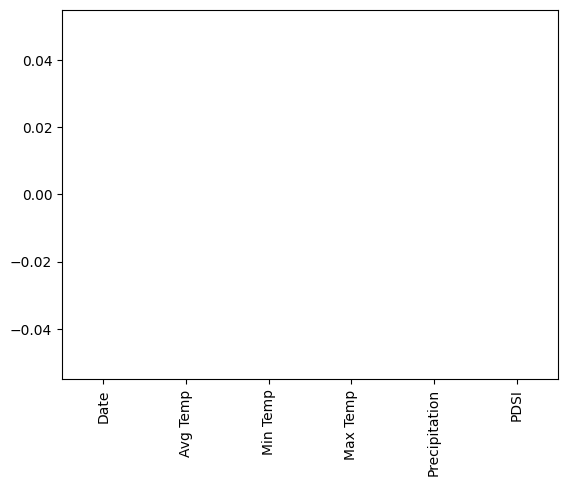

In [255]:
nulls = data.isnull().sum()
nulls.plot(kind="bar")

Plot the relationship between Precipitation and Average Temperature

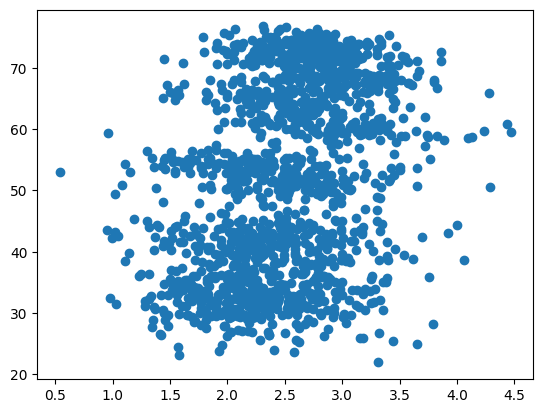

In [256]:
plt.scatter(x=data["Precipitation"], y=data["Avg Temp"])

Plot the relationship between PDSI and Average Temperature

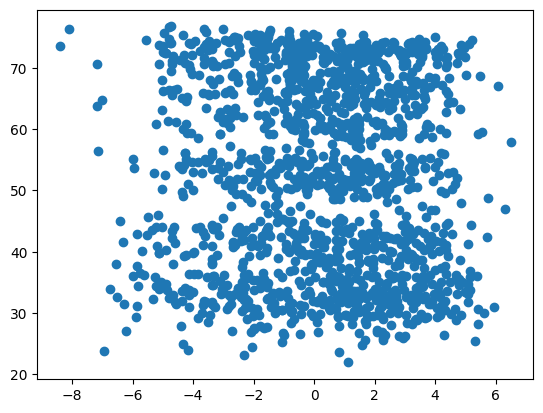

In [257]:
plt.scatter(x=data["PDSI"], y=data["Avg Temp"])

Get the data from June of every year

In [258]:
data["Date"] = data["Date"].astype(str)
june = data[data["Date"].str[4:6] == "06"]
june

,Date,Avg Temp,Min Temp,Max Temp,Precipitation,PDSI
5,189506,67.80,54.72,80.89,2.95,0.20
17,189606,69.89,56.52,83.26,2.64,-0.59
29,189706,68.11,55.31,80.91,2.88,-0.83
41,189806,69.31,56.66,81.97,3.07,0.47
53,189906,68.65,55.74,81.54,2.97,-0.47
...,...,...,...,...,...,...
1493,201906,68.72,56.23,81.21,3.37,5.47
1505,202006,70.29,57.51,83.07,2.73,-0.30
1517,202106,72.59,59.58,85.62,2.97,-2.81
1529,202206,70.81,57.85,83.75,2.36,-2.82


Plot the Average Temperature of June between 1895 and 2023

<Axes: xlabel='Date'>

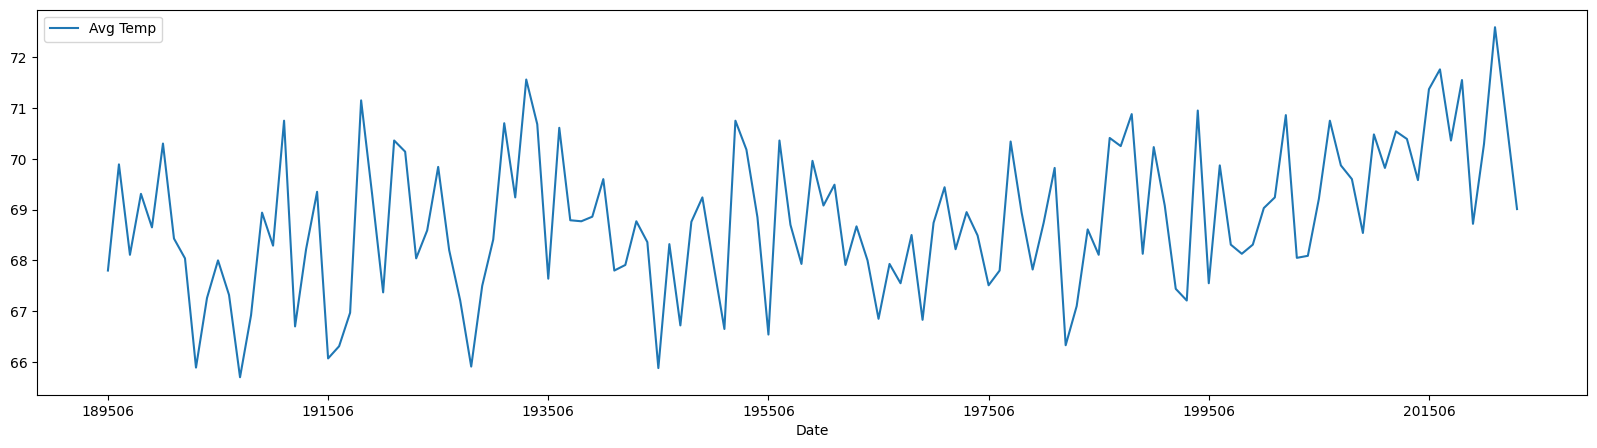

In [259]:
june.plot(x="Date", y="Avg Temp", figsize=(20, 5))

Plot the Precipitation levels of June between 1895 and 2023

<Axes: xlabel='Date'>

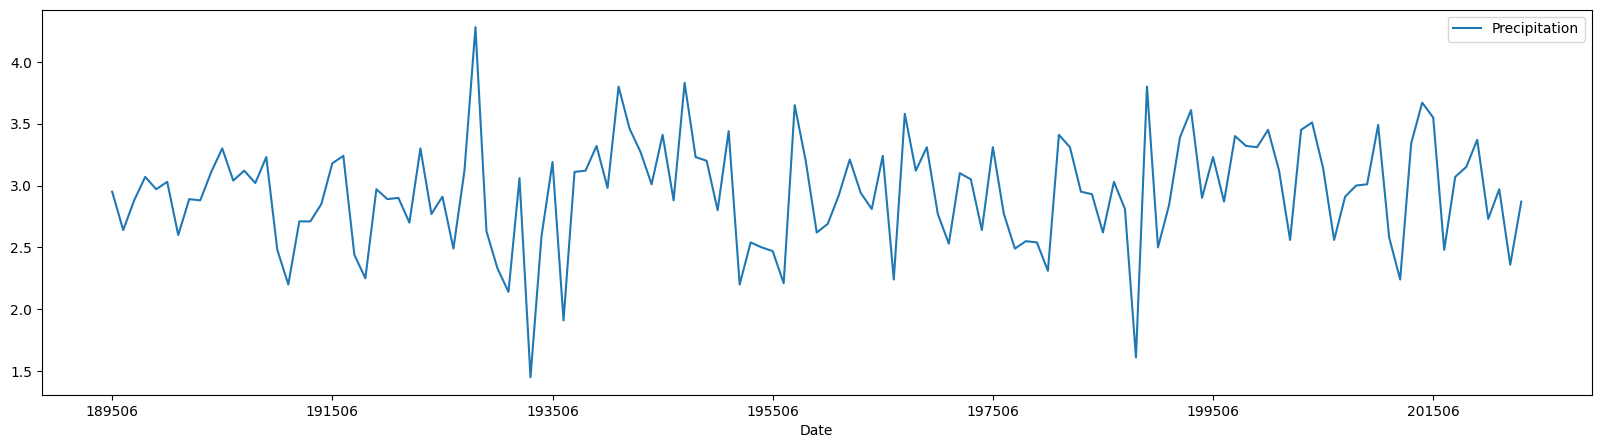

In [260]:
june.plot(x="Date", y="Precipitation", figsize=(20, 5))

Plot the PDSI of June between 1895 and 2023

<Axes: xlabel='Date'>

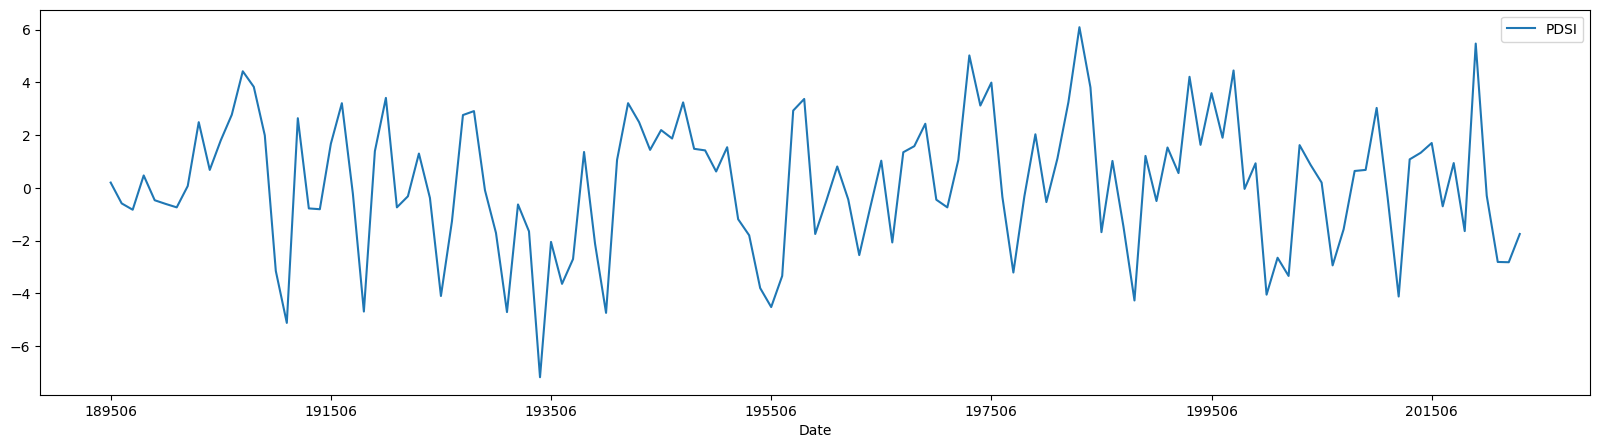

In [261]:
june.plot(x="Date", y="PDSI", figsize=(20, 5))

Decompose Average Temperature into different components, most notably 'Seasonality'

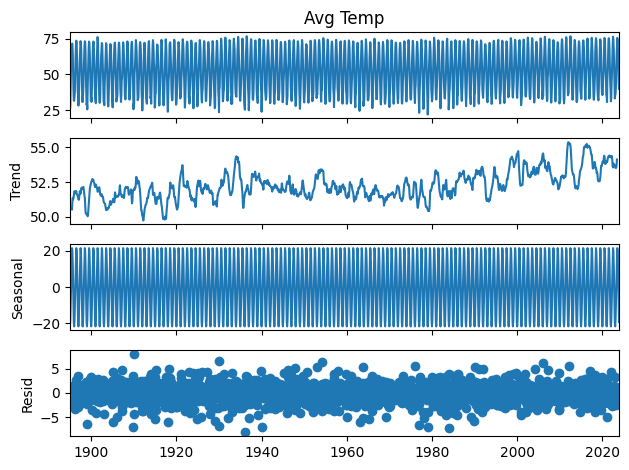

In [262]:
df = data

df['Date'] = pd.to_datetime(df['Date'], format='%Y%m')

df.set_index('Date', inplace=True)

result = seasonal_decompose(df['Avg Temp'], model='additive', period=12)

result.plot()

plt.show()

Remove seasonality component from Average Temperature

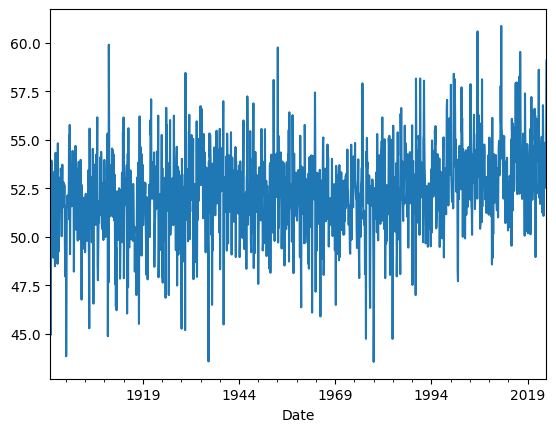

In [263]:
deseasonalized_data = df['Avg Temp'] - result.seasonal

deseasonalized_data.plot()

plt.show()

Repeat above process for Minimum and Maximum Temperatures, as these variables have strong seasonal patterns

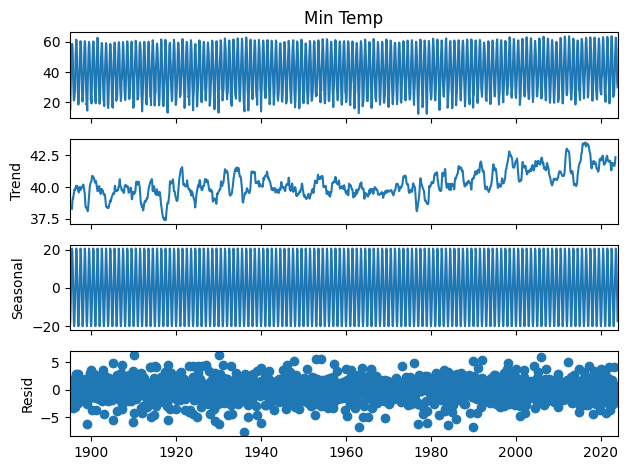

In [264]:
result = seasonal_decompose(df['Min Temp'], model='additive', period=12)

result.plot()

plt.show()

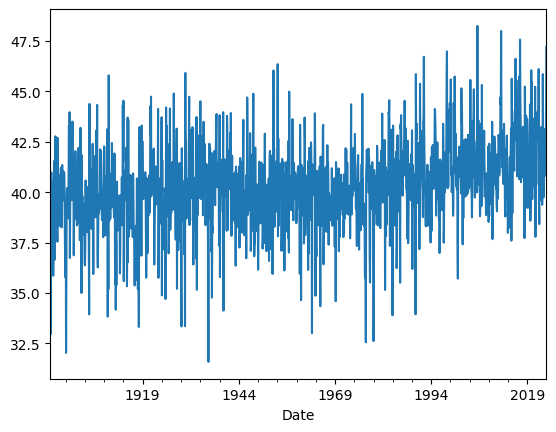

In [265]:
deseasonalized_data = df['Min Temp'] - result.seasonal

deseasonalized_data.plot()

plt.show()

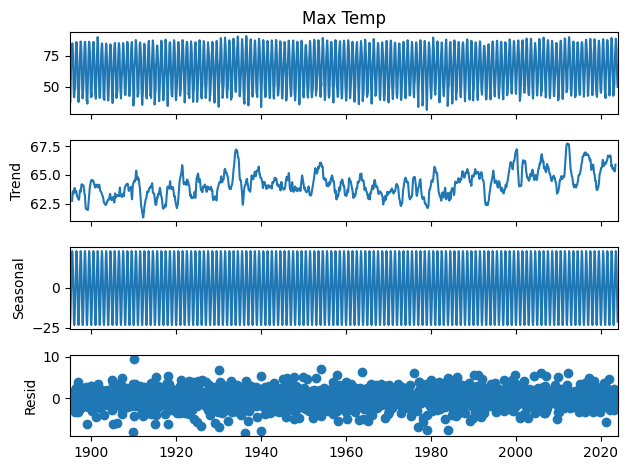

In [266]:
result = seasonal_decompose(df['Max Temp'], model='additive', period=12)

result.plot()

plt.show()

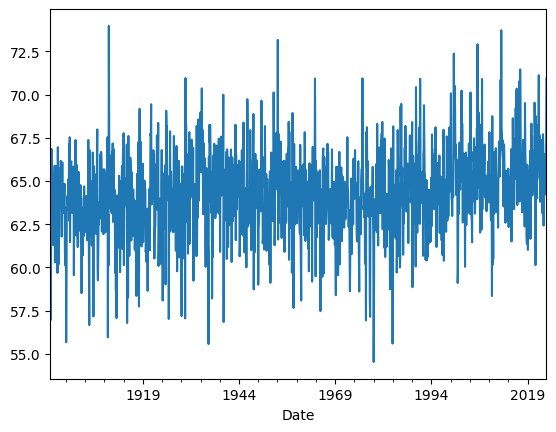

In [267]:
deseasonalized_data = df['Max Temp'] - result.seasonal

deseasonalized_data.plot()

plt.show()

Create Multilinear Regression model

In [270]:
X = data.reindex(["Precipitation", "PDSI", "Min Temp", "Max Temp"], axis="columns")
X = sm.add_constant(X)
y = data['Avg Temp']

fit = sm.OLS(y, X).fit()

Find statistical summary of the above model

In [271]:
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Avg Temp   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.683e+09
Date:                Tue, 26 Mar 2024   Prob (F-statistic):               0.00
Time:                        09:06:12   Log-Likelihood:                 5409.2
No. Observations:                1548   AIC:                        -1.081e+04
Df Residuals:                    1543   BIC:                        -1.078e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0046      0.003     -1.365      0.172      -0.011       0.002
Precipitation    -0.0002      0.000     -0.509      0.611      -0.001       0.001
PDSI           1.236e-05   7.66e-05      0.161      0.872      -0.000       0.000
Min Temp          0.5000      0.000   2875.184      0.000       0.500       0.500
Max Temp          0.5002      0.000   3334.624      0.000       0.500       0.500
==============================================================================
Omnibus:                        5.900   Durbin-Watson:                   1.924
Prob(Omnibus):                  0.052   Jarque-Bera (JB):                4.919
Skew:                          -0.053   Prob(JB):                       0.0855
Kurtosis:                       2.745   Cond. No.                     1.43e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.43e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""